In [2]:
%pip install matplotlib
%pip install seaborn 
import matplotlib.pyplot as plt;
import seaborn as sns;
from PIL import Image 
from matplotlib.pyplot import imshow
%matplotlib inline  
import numpy as np;
import glob
import os

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Image Ingest

In [3]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

## Set Healthy Kernel

In [4]:
set_kernel = True;
invert_image = False;


In [5]:
%pip install scikit-image 

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
#from scipy.ndimage import gaussian_filter
#from skimage import data
#from skimage import img_as_float
#from skimage.morphology import reconstruction



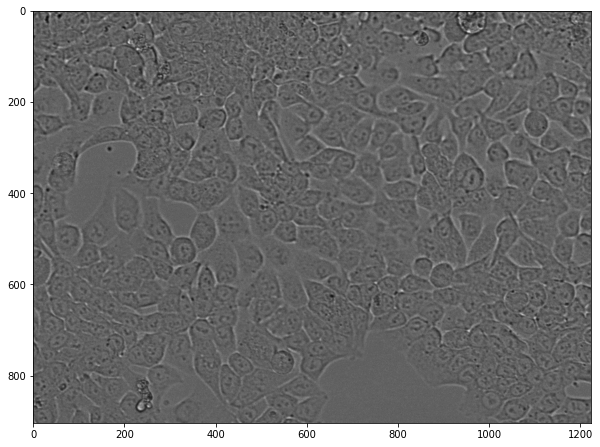

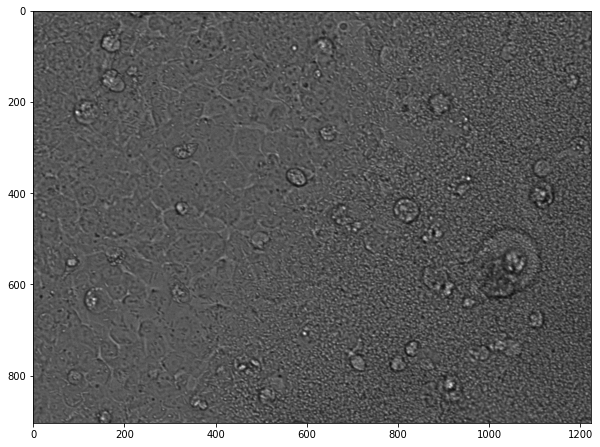

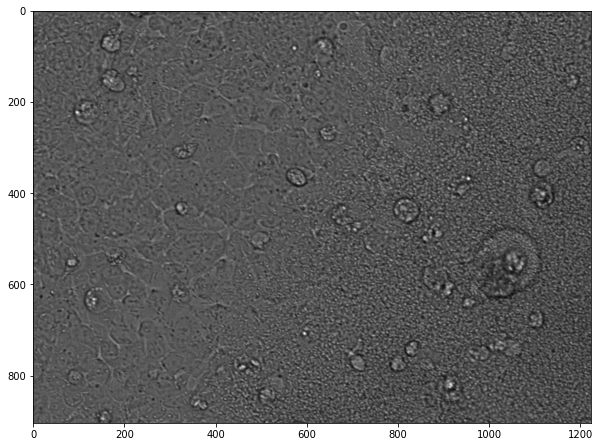

In [8]:
#Healthy Cells

im = Image.open("Data/Kernels/HCT116-Healthy_NC_10_2_20.tif");

#imshow(np.asarray(im))
im_array_gray = np.asarray(im,dtype=np.float32)
#im_array_gray = rgb2gray(im_array);
if invert_image:
    im_array_gray = (np.abs(255.0-im_array_gray))

im_array_gray_HCT116 = im_array_gray;
plt.figure(figsize=(10,20))
imshow(im_array_gray_HCT116,cmap='gray')
#Cells Condensing/Circular Cells 

# in focus circular cells 
im = Image.open("Data/Kernels/HCT116-UnhealthyCell_BacterialPatch.tif");
im_array_gray = np.asarray(im,dtype=np.float32)
#im_array_gray = rgb2gray(im_array_gray);
if False:
    im_array_gray = (255.0-im_array_gray)
im_array_gray_circular_infocus = im_array_gray;
plt.figure(figsize=(10,20))
imshow(im_array_gray_circular_infocus,cmap='gray')

# in focus cells with junctions and bacteria 
#im = Image.open("Data/Kernels/runawaygrowth_kernels/F4_1_Image_D5O16_A549_T02.tif"); # infocusjunctions');
#im_array_gray = np.asarray(im,dtype=np.float32)
#if False:
#    im_array_gray = 255.0-im_array_gray
#im_array_gray_junctions_infocus = im_array_gray;


# out of focus cells with junctions and bacteria 
#im = Image.open("Data/Kernels/runawaygrowth_kernels/F4_1_Image_D5O16_A549_T14.tif"); # out of focus circular cells;
#im_array_gray = np.asarray(im,dtype=np.float32)
#if False:
#    im_array_gray = 255.0-im_array_gray
#im_array_gray_junctions_outfocus = im_array_gray;


# Images of Bacterial Patch 

im = Image.open("Data/Kernels/HCT116-UnhealthyCell_BacterialPatch.tif"); # images of bacterial patch 
im_array_gray = np.asarray(im,dtype=np.float32)
#im_array_gray = rgb2gray(im_array_gray);
if True:
    im_array_gray = (np.abs(255.0-im_array_gray))
im_array_gray_bacterial_patch = im_array_gray/np.max(im_array_gray);
plt.figure(figsize=(10,20))
imshow(im_array_gray_bacterial_patch,cmap='gray')


# No Macrophages were included in initial assay

#im = Image.open("Data/Kernels/C2_04_1_1_Bright Field_008.tif");
#im_array_gray = np.asarray(im,dtype=np.float32)
#im_array_gray = rgb2gray(im_array);
#if invert_image:
#    im_array_gray = (np.abs(255.0-im_array_gray))
#im_array_gray_macrophage = im_array_gray;
#im_array_gray_dendritic = im_array_gray;
    

In [ ]:
# Unhealthy cells 
im = Image.open("Data/Kernels/HCT116-UnhealthyCell_BacterialPatch.tif");
#im = Image.open("Data/Kernels/Unhealthy_cell_kernels/C6_04_1_1_Bright Field_009.tif");
plt.figure(figsize=(20,10))
imshow(np.asarray(im))
im_array_gray = np.asarray(im,dtype=np.float32)
#im_array_gray = rgb2gray(im_array_gray);
if invert_image:
     im_array_gray = (np.abs(255.0-im_array_gray))

im_array_gray_HCT116_UH = im_array_gray;


#im = Image.open("Data/Kernels/Unhealthy_cell_kernels/C6_04_1_1_Bright Field_009.tif");
#im_array_gray = np.asarray(im,dtype=np.float32)
#im_array_gray = rgb2gray(im_array);
#if invert_image:
#    im_array_gray = (np.abs(255.0-im_array_gray))
#im_array_gray_macrophage_UH = im_array_gray;
#im_array_gray_dendritic_UH = im_array_gray;
    

In [ ]:
#plt.figure(figsize=(20,20))
#imshow(im_array_gray_bacterial_patch,cmap='gray')
#plt.figure(figsize=(5,5))
#imshow(im_array_gray_bacterial_patch[550:650,550:650],cmap='gray')

## Shaded Normal Kernel Extraction 

In [ ]:
## Set Healthy Kernels

#set_kernel=True;
if set_kernel:
    #sample_kernel = np.array(im_array_gray[275:325,750:820])  # single healthy feature

    #sample_kernel = np.array(im_array_gray[340:370,320:350])  #pathogenecity feature 
    #sample_kernel = np.array(im_array_gray[190:235,590:630])  # single healthy feature

    #sample_kernel = np.array(im_array_gray[240:360,700:820])  # multiple healthy feature
    
    #Define Healthy A549s
    sample_kernel_healthy_HCT116 = np.array(im_array_gray_HCT116[250:350,650:750])
    sample_kernel_healthy_HCT116 = (np.mean(sample_kernel_healthy_HCT116,axis=None)-sample_kernel_healthy_HCT116)/(np.mean(sample_kernel_healthy_HCT116,axis=None))
    sample_kernel_healthy_HCT116[sample_kernel_healthy_HCT116<0] =0.0; 
    mask_sample_kernel_healthy_HCT116 = sample_kernel_healthy_HCT116;
    #plt.figure()
    #imshow(mask_sample_kernel_healthy_A549,cmap='gray')

    #Define Bacterial Patches
    sample_kernel_bacterial_patch = np.array(im_array_gray_bacterial_patch[685:715,685:715]) #np.array(im_array_gray_bacterial_patch[625:795,350:550])#
    sample_kernel_bacterial_patch = (np.mean(sample_kernel_bacterial_patch,axis=None)-sample_kernel_bacterial_patch)/(np.mean(sample_kernel_bacterial_patch,axis=None))
    sample_kernel_bacterial_patch[sample_kernel_bacterial_patch<0.00] =0.0; 
    mask_sample_kernel_bacterial_patch = sample_kernel_bacterial_patch#/np.max(sample_kernel_bacterial_patch);
    
#Unhealthy cells
if set_kernel:
    sample_kernel_unhealthy_HCT116 = np.array(im_array_gray_HCT116_UH[600:700,200:300])
    sample_kernel_unhealthy_HCT116 = (np.mean(sample_kernel_unhealthy_HCT116,axis=None)-sample_kernel_unhealthy_HCT116)/(np.mean(sample_kernel_unhealthy_HCT116,axis=None))
    sample_kernel_unhealthy_HCT116[sample_kernel_unhealthy_HCT116<0.00] =0.0; 
    mask_sample_kernel_unhealthy_HCT116 = sample_kernel_unhealthy_HCT116;
    plt.figure()
    imshow(mask_sample_kernel_unhealthy_HCT116)
    

    

In [ ]:
plt.figure()
imshow(np.abs(sample_kernel_healthy_HCT116),cmap='gray')
plt.title('Healthy HCT 116 Kernel')

#plt.figure()
#imshow(np.abs(sample_kernel_healthy_dendritic),cmap='gray')
#plt.title('Healthy Dendritic')

#plt.figure()
#imshow(np.abs(sample_kernel_healthy_macrophage),cmap='gray')
#plt.title('Healthy Macrophages')

plt.figure()
imshow(np.abs(sample_kernel_bacterial_patch),cmap='gray')
plt.title('Bacterial Patch')


#cbar = plt.colorbar()
#ax = plt.gca()
#ax.set_xticklabels({})
#ax.set_yticklabels({})
#cbar.ax.tick_params(labelsize=20) 

In [ ]:
#Unhealthy cells plots
plt.figure()
imshow(np.abs(sample_kernel_unhealthy_HCT116),cmap='gray')
plt.title('Unhealthy HCT116 Innards')

#plt.figure()
#imshow(np.abs(sample_kernel_unhealthy_dendritic),cmap='gray')
#plt.title('Unhealthy Dendritic')

#plt.figure()
#imshow(np.abs(sample_kernel_unhealthy_macrophage),cmap='gray')
#plt.title('Unhealthy Macrophage')


#plt.title('Condensing A549 Kernel with Bacteria')
#plt.figure()
#imshow(np.abs(sample_kernel_unhealthy_dendritic),cmap='gray')
#plt.title('Unhealthy Dendritic')
#plt.figure()
#imshow(np.abs(sample_kernel_unhealthy_macrophage),cmap='gray')
#plt.title('Unhealthy Macrophage')


cbar = plt.colorbar()
ax = plt.gca()
ax.set_xticklabels({})
ax.set_yticklabels({})
cbar.ax.tick_params(labelsize=20) 

### Load Image Files to Analyze 

In [ ]:


list_of_kernels = [mask_sample_kernel_healthy_HCT116,mask_sample_kernel_unhealthy_HCT116,mask_sample_kernel_bacterial_patch]##[mask_sample_kernel_healthy_A549,mask_sample_kernel_healthy_dendritic,mask_sample_kernel_healthy_macrophage,mask_sample_kernel_unhealthy_A549,mask_sample_kernel_unhealthy_dendritic,mask_sample_kernel_unhealthy_macrophage,mask_sample_kernel_bacterial_patch]
#list_of_alphas = [3.75,13.5,1.91];#[3.75,13.0,5.1,8.5,8.2,11.25,4.06]
#list_of_colors = ['g','r','b']

#bacterial patch - 7.65



## Generate family of kernels: 
list_kernel_families = [];
for sample_kernel_ind in range(0,len(list_of_kernels)):
    mask_sample_kernel = list_of_kernels[sample_kernel_ind];
    base_angle = 0;
    kernel_family = [];
    for delta in range(base_angle,360,10):
        this_family_kernel_img= Image.fromarray(np.uint8(mask_sample_kernel * 255) ).rotate(angle=base_angle+delta)
        rotated_kernel = np.array(this_family_kernel_img,dtype=np.float32)/255.0
        kernel_family.append(rotated_kernel);
    list_kernel_families.append(kernel_family);    


In [ ]:
for kernel_family in list_kernel_families:
    
    figs,list_of_ax = plt.subplots(1,len(kernel_family))
    
    figs.set_size_inches((120,100))
    for ind in range(0,len(list_of_ax)):
        this_ax = list_of_ax[ind];
        plt.sca(this_ax)
        plt.imshow(kernel_family[ind],cmap='gray')
    #plt.show()


In [ ]:
import itertools
#rootdir = '/Users/eyeung/Box/PNNL Friend or Foe Upload/20200318 A-540 IV_V Pathogens T05-T11/20200318 A-540 IV_V Pathogens T05-T11/20200318 A-540 IV_V Pathogens T05-T11';
#rootdir = '/Users/eyeung/Box/PNNL Friend or Foe Upload/20200611 A-549 P2 IV_V Pathogen #03-05/20200611 A-549 P2 IV_V Pathogen #03-05';
rootdir = '/Users/enochyeung/Box/PNNL Friend or Foe Upload/20201002 DLD-1 HCT-15 HCT-116 Ecoli Nissle Sflexneri/20201002 DLD-1 HCT-15 HCT-116 Ecoli Nissle Sflexneri/201002_151044_Plate 1';
all_orig_files = os.listdir(rootdir);
filterdir = '/Users/eyeung/Box/DARPAFoF UCSB Team Share/Repr_Images/'; #
#filterdir = '/Users/eyeung/Desktop/HighRes_Trial1/'+ rootdir.split('/')[-1];
all_files = [];
for file in all_orig_files:
    #if not os.path.isfile(filterdir+'/'+file):
        all_files.append(file);
#print(all_files)
        
all_plate_rows = ['A','B','C','D'];
all_plate_cols = ['1','2','3','4','5','6','7','8','9','10','11','12'];

Pos_Flag = list(itertools.product(all_plate_rows,all_plate_cols))
Pos_Flag = [elem[0]+elem[1] for elem in Pos_Flag]
print(Pos_Flag)

In [ ]:
import time;
time.perf_counter()
calibrate_kernels = True
list_of_alphas = [6.25,17.0,26.5];#[3.75,13.0,5.1,8.5,8.2,11.25,4.06]
list_of_colors = ['g','r','b']
import pickle
row_res_masking = 10;
col_res_masking = 10;
kernel_names = ['hHCT116','uhHCT116','bp']
invert_image = False
norms_pos_file_suffix = dict();
#feature_dict = pickle.load(open('TA1MarchMixture.pickle','rb'))
#open('March_Dynamic_Feature_Session.pickle','rb').close()
feature_dict = dict();
for This_Pos_Flag in Pos_Flag:
    norms_pos_file_suffix[This_Pos_Flag] = dict();
    feature_dict[This_Pos_Flag] = dict();
    file_list_suffixes = [elem for elem in all_files if This_Pos_Flag == elem.split('_')[0] and  (0<np.int(elem.split('_')[-1].strip('.tif'))<14) and (np.int(elem.split('_')[-1].strip('.tif'))%1 ==0) ]
    #file_list_suffixes = [elem for elem in file_list_suffixes if '19.png' in elem]
    print(file_list_suffixes)
    
    for file_list_suffix in file_list_suffixes:

        
        TimeKey = file_list_suffix.strip('.tif').split('_')[-1][1:].strip('.png')
        #print(repr(TimeKey))
        norms_over_kernels_list = [None]*len(list_of_kernels);
        norms_pos_file_suffix[This_Pos_Flag][TimeKey] = norms_over_kernels_list;
        feature_dict[This_Pos_Flag][TimeKey] = dict();

        filename_in = rootdir +'/' + file_list_suffix;
        
        if not(os.path.isdir('/Users/enochyeung/Desktop/Kernel_Calibration_Results/'+ rootdir.split('/')[-1]) ):
            os.mkdir('/Users/enochyeung/Desktop/Kernel_Calibration_Results/'+ rootdir.split('/')[-1]);
        filename_out = "/Users/enochyeung/Desktop/Kernel_Calibration_Results/" + rootdir.split('/')[-1] + '/'+ file_list_suffix;

        im = Image.open(filename_in);
        im_array_gray = np.asarray(im,dtype=np.float32)
        #im_array_gray = rgb2gray(im_array_gray);
        im_array_gray = im_array_gray[350:650,350:650]
        if invert_image:
            im_array_gray = (np.abs(255.0-im_array_gray))

        ### Feature Extraction


        this_orig_fig = plt.figure(figsize=(35,23));
        this_orig_ax = this_orig_fig.gca() 
        this_orig_ax.imshow(im_array_gray,cmap='gray')
        
        centroid_fig = plt.figure(figsize=(35,23))
        plt.imshow(im_array_gray,cmap='gray')
        
        
        for sample_kernel_ind in [0,2]:#len(list_of_kernels)):

            mask_sample_kernel = list_of_kernels[sample_kernel_ind];
            norm_alpha = list_of_alphas[sample_kernel_ind];
            print(norm_alpha)
            this_color = list_of_colors[sample_kernel_ind];
            this_kernel_family = list_kernel_families[sample_kernel_ind];
            num_rows = im_array_gray.shape[0];
            num_cols = im_array_gray.shape[1];
            mask_rows = mask_sample_kernel.shape[0]
            mask_cols = mask_sample_kernel.shape[1];
            import matplotlib.patches as patches
            all_norms = [];
            all_rotated_norms = [];
            all_rects = [];
            all_centroid_rects = [];
            Raw_Subimage_Count = 0;
            thresholded_norms = im_array_gray-im_array_gray;#np.zeros(shape=( np.int((num_rows-mask_rows)/row_res)+1,np.int((num_cols-mask_cols)/col_res)+1),dtype=np.float32); 
            #Downstream_Image = thresholded_norms;
            
            for row_ind in np.arange(0,num_rows-mask_rows-0,row_res_masking):
                for col_ind in np.arange(0,num_cols-mask_cols,col_res_masking):
                    Raw_Subimage = np.array(im_array_gray[row_ind:row_ind+mask_rows,col_ind:col_ind+mask_cols]);
                    Raw_Subimage = (np.mean(Raw_Subimage,axis=None)-Raw_Subimage)/(np.mean(Raw_Subimage,axis=None))
                    Raw_Subimage[Raw_Subimage<0.0]=0.0;

                    #Family of Kernel Processing Layer
                    base_angle = 0;
                    rotated_norms = [];
                    for rotated_kernel in this_kernel_family:
                        temp_filtered_image = np.array(Raw_Subimage);
                        temp_filtered_image[rotated_kernel==0.0]=0.0;
                        this_norm = np.linalg.norm(rotated_kernel-temp_filtered_image,'fro')
                        rotated_norms.append(1e4*this_norm/(rotated_kernel.shape[0]*rotated_kernel.shape[1]));
                    
                    all_rotated_norms.append(rotated_norms);
                    all_norms.append(np.min(rotated_norms));#[this_norm,col_ind,row_ind]);

                    
                    if sample_kernel_ind <2 and norm_alpha>np.min(rotated_norms):#0.06<this_norm:                       
                        this_rect = patches.Rectangle((col_ind,row_ind),mask_cols,mask_rows,linewidth=3,edgecolor=this_color,facecolor='none',alpha=0.5);
                        all_rects.append(this_rect);
                        thresholded_norms[np.int(row_ind)][np.int(col_ind)] = np.min(rotated_norms);
                    if sample_kernel_ind ==2 and norm_alpha> np.min(rotated_norms):#0.06<this_norm:                       
                        this_rect = patches.Rectangle((col_ind,row_ind),mask_cols,mask_rows,linewidth=3,edgecolor=this_color,facecolor='none',alpha=0.5);
                        all_rects.append(this_rect);
                        thresholded_norms[np.int(row_ind)][np.int(col_ind)] = np.min(rotated_norms);

            #print(all_norms)
             
                    
            ax = this_orig_fig.gca()
            for rect in all_rects:
                ax.add_patch(rect)
            plt.draw()
            norms_over_kernels_list[sample_kernel_ind] = thresholded_norms;
            
            
            centroid_mask = np.ones((mask_rows,mask_cols));
            #centroid_mask[4,4] = 5.0;
            #centroid_mask = np.asarray(centroid_mask)
            
            num_rows_mf = thresholded_norms.shape[0];
            num_cols_mf = thresholded_norms.shape[1];
            mask_rows_mf = centroid_mask.shape[0]
            mask_cols_mf = centroid_mask.shape[1];
            Post_Image = thresholded_norms - thresholded_norms;
            #Centroid_Annotated_Image = np.array(im_array_gray)
            row_res_mf = np.int(mask_rows/2);
            col_res_mf = np.int(mask_cols/2);
            num_centroids_detect_this_feature = 0; 
            unique_centroids = set();
            for row_ind in np.arange(0,num_rows_mf-mask_rows_mf,row_res_mf):
                for col_ind in np.arange(0,num_cols_mf-mask_cols_mf,col_res_mf):
                    Raw_Subimage = np.array(thresholded_norms[row_ind:row_ind+mask_rows_mf,col_ind:col_ind+mask_cols_mf]);
                    
                    if np.max(Raw_Subimage)>0.0:
                        #fig, axs = plt.subplots(1,2,figsize=(15,15),sharey=True,sharex=True)
                        #ax1 = axs[0]
                        #ax2 = axs[1];
                        
                        #fg_color = 'white'
                        #bg_color = 'black'
                        #im = ax1.imshow(Raw_Subimage,cmap='gray');
                        #cb = plt.colorbar(im);
                        #ax1.set_title('Preprocessing', color=bg_color)
                        #ax1.patch.set_facecolor(bg_color)
                        #plt.colorbar(im,ax=ax1,fraction=.05)
                        #Raw_Subimage_OnePass = np.matmul(Raw_Subimage,centroid_mask);
                        Raw_Subimage = -Raw_Subimage;
                        Raw_Subimage[Raw_Subimage==0] = -np.Inf;
                        opt_row,opt_col  = np.unravel_index(Raw_Subimage.argmax(),Raw_Subimage.shape)
                        #print((row_ind+opt_row,col_ind+opt_col))
                        Post_Image[row_ind+opt_row-5:row_ind+opt_row+5,col_ind+opt_col-5:col_ind+opt_col+5] = -np.max(Raw_Subimage) 
                        #Centroid_Annotated_Image[row_ind+opt_row-1:row_ind+opt_row+1,col_ind+opt_col-1:col_ind+opt_col+1] = np.max(Raw_Subimage)
                        predicted_centroid_row = (row_ind+opt_row);
                        predicted_centroid_col = (col_ind+opt_col);
                        if not ((predicted_centroid_row,predicted_centroid_col) in unique_centroids):
                            num_centroids_detect_this_feature = num_centroids_detect_this_feature +1;
                            unique_centroids.add((predicted_centroid_row,predicted_centroid_col));
                        this_centroid_rect = patches.Rectangle((predicted_centroid_col,predicted_centroid_row),10,10,linewidth=3,edgecolor=this_color,facecolor='none',alpha=0.8);
                        all_centroid_rects.append(this_centroid_rect);
                        #print(((row_ind+opt_row)*row_res_masking,(col_ind+opt_col)*col_res_masking))
                        #Post_Image[row_ind:row_ind+mask_rows,col_ind:col_ind+mask_cols] = Raw_Subimage_OnePass;

                        #im = ax2.imshow(Raw_Subimage_OnePass,cmap='gray');
                        #plt.colorbar(im,ax=ax2,fraction=.05)
                        #ax2.set_title('Postprocessing', color=bg_color)
                        #ax2.patch.set_facecolor(bg_color)
                        #plt.show()
            
            feature_dict[This_Pos_Flag][TimeKey][kernel_names[sample_kernel_ind]] = num_centroids_detect_this_feature;
            output_file = open("/Users/enochyeung/Desktop/Kernel_Calibration_Results/" + rootdir.split('/')[-1] + '.pickle','wb')
            #pickle.dump(feature_dict,output_file)
            #output_file.close()
            
            
            ### Activate to show max pooling process 
            #plt.figure(figsize=(35,23))
            #plt.imshow(thresholded_norms,cmap='gray')
            #plt.figure(figsize=(35,23))
            #plt.imshow(Post_Image,cmap='gray')
            
            
            
            centroid_ax = centroid_fig.gca()
            for rect in all_centroid_rects:
                centroid_ax.add_patch(rect)
            #plt.draw()
            #plt.show()
            if calibrate_kernels:
                plt.figure()
                plt.hist(all_norms,bins=200);

                ax = plt.gca()
        #
                ax.spines['right'].set_visible(False)
                ax.spines['top'].set_visible(False)

                # Only show ticks on the left and bottom spines
                ax.yaxis.set_ticks_position('left')
                ax.xaxis.set_ticks_position('bottom')
                plt.ylabel('Frequency/Count',size=20)
                plt.xlabel('Frobenius Norm of Convolution w/ P-Feature ',size=20)
                plt.title(kernel_names[sample_kernel_ind] + ' P-Feature')
                #plt.xlim([0.0,5.0])
#                plt.show()

        
        
        
        
        
        plt.tight_layout()
        #plt.show()
        this_orig_fig.savefig(filename_out);
        plt.close();
time.perf_counter();


In [ ]:
feature_dict['C1']

In [ ]:
list_of_colors

In [ ]:

#time_keys = ['02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19'];
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
from scipy.signal import savgol_filter

all_row_ind = ['C']
#all_row_ind = ['A','B','C','D','E','F','G','H']
#all_row_ind = all_row_ind.reverse()
#all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12']
all_col_ind = ['1']
plt.figure(figsize=(24,16))
for row_ind in range(0,len(all_row_ind)):
    for col_ind in range(0,len(all_col_ind)):
        this_well = all_row_ind[row_ind] + all_col_ind[col_ind];
        #this_well = 'A12'
        #time_keys = [ repr(elem) for elem in range(71,80)]
        time_keys = list(feature_dict[this_well].keys());
        for kernel_ind in [0,2]:
            kernel =  kernel_names[kernel_ind];
            if kernel_ind==2:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                ys = [elem for elem in ys]
            if kernel_ind==0:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            if kernel_ind ==1:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
            times = [np.float(np.int(elem)*30.0/60.0) for elem in time_keys]
            subax = plt.subplot(len(all_row_ind),len(all_col_ind),len(all_col_ind)*(row_ind)+(col_ind+1),frameon=True,fc='white',)
            ys = savgol_filter(ys, 9, 3) # window size 51, polynomial order 3
            subax.plot(times,ys,'.--',ms=40,color=list_of_colors[kernel_ind])
            #ax = plt.gca()
            #plt.ylim([0,1.0])
            #subax.set_yscale('log')
        subax.spines['right'].set_visible(False)
        subax.spines['top'].set_visible(False)   
        #if not (row_ind ==7):
        #subax.get_xaxis().set_ticks([repr(np.int(elem)*30.0/60.0) for elem in time_keys])
        if not (col_ind ==0):
            subax.get_yaxis().set_ticks([])
        if row_ind==0 and col_ind==11:
            plt.legend(['hA549','uhA549','bpatch'],fontsize=10,frameon=False)
#        subax.set_facecolor('gray')
plt.ylabel('# of Clusters Estim.',size=40)
plt.xlabel('Time (Hrs)',size=40)




In [ ]:


kernel_names = ['hA549','uha549','bp']
list_of_colors = ['g','r','b']

In [ ]:
time_keys = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19'];
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
from scipy.signal import savgol_filter

all_row_ind = ['G']
#all_row_ind = all_row_ind.reverse()
all_col_ind = ['4']
plt.figure(figsize=(12,12))
#this_well = all_row_ind[row_ind] + all_col_ind[col_ind];
this_well = 'G4'
for kernel_ind in [0,1,2]:
    kernel =  kernel_names[kernel_ind];
    if kernel_ind==2:
        ys = [10*feature_dict[this_well][elem][kernel] for elem in time_keys]
        ys = [elem - ys[0] for elem in ys]
    if kernel_ind==0:
        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
    if kernel_ind ==1:
        ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
    times = [np.float(np.int(elem)*2.0) for elem in time_keys]

    ys = savgol_filter(ys, 9, 2) # window size 51, polynomial order 3
    plt.plot(times,ys/max(ys),'.--',ms=30,color=list_of_colors[kernel_ind])
    subax = plt.gca()
    plt.xlabel('Time (Hrs)',size=30)
    plt.ylabel('Estim. Centroid Features in G4',size=30)
    #ax = plt.gca()
    #plt.ylim([-10,400])
    #subax.set_yscale('log')
    subax.spines['right'].set_visible(False)
    subax.spines['top'].set_visible(False)   
    #if not (row_ind ==7):
    #    subax.get_xaxis().set_ticks([])
    #if not (col_ind ==0):
    #    subax.get_yaxis().set_ticks([])
    #if row_ind==0 and col_ind==11:
    plt.legend(['healthy A549','unhealthy A549','bacterial patches'],fontsize=30,frameon=False)
#        subax.set_facecolor('gray')

